In [1]:
# Importing the Keras libraries and package
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
import tensorflow as tf
import sklearn


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN
# Initializing the CNN
classifier = Sequential()
# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the layers
classifier.add(Flatten())
# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=35, activation='softmax')) # softmax for more than 2

In [3]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [5]:
import numpy as np
import shutil
classes_dir = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','1','2','3','4','5','6','7','8','9'] #total labels
for i in classes_dir:
    os.makedirs('data4/' + i)
    
    

In [6]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [7]:
def fun(i,x,j):
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='data4\\'+j, save_prefix=str(i), save_format='jpg'):
        i=i+1
        if(i>1200):
            return
            

In [8]:

for j in classes_dir:
    img=load_img("C:\\Users\\Lenovo\\Desktop\\ISL\\ppdata\\"+j+"\\0.jpg")
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i=0
    fun(i,x,j)
    
        
          # otherwise the generator would loop indefinitely

In [9]:
root_dir = 'data4'

In [10]:
import os
import numpy as np
import shutil
import random

tf.keras.preprocessing.image_dataset_from_directory(
    root_dir,
    labels="inferred",
    label_mode="int",
    class_names= classes_dir,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 39629 files belonging to 35 classes.


<BatchDataset shapes: ((None, 128, 128, 1), (None,)), types: (tf.float32, tf.int32)>

In [11]:
for i in classes_dir:
    os.makedirs(root_dir +'/train/' + i)
    os.makedirs(root_dir +'/test/' + i)
    source = root_dir + '/' + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    test_ratio = 0.25
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]
    for name in train_FileNames:
          shutil.copy(name, root_dir +'/train/' + i)
    for name in test_FileNames:
          shutil.copy(name, root_dir +'/test/' + i)

In [12]:
len(train_FileNames)

855

In [13]:
# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory('data4/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 29711 images belonging to 35 classes.


In [15]:
test_set = test_datagen.flow_from_directory('data4/test',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 9918 images belonging to 35 classes.


In [17]:
history=classifier.fit_generator(
        training_set,
        steps_per_epoch=2625, # No of images in training set
        epochs=14,
        validation_data=test_set,
        validation_steps=875)# No of images in test seta

Epoch 1/14
2625/2625 [==============================] - 435s 166ms/step - loss: 2.4822 - accuracy: 0.2321 - val_loss: 1.6535 - val_accuracy: 0.4704
Epoch 2/14
2625/2625 [==============================] - 406s 155ms/step - loss: 1.6811 - accuracy: 0.4558 - val_loss: 1.0842 - val_accuracy: 0.6495
Epoch 3/14
2625/2625 [==============================] - 382s 146ms/step - loss: 1.2906 - accuracy: 0.5814 - val_loss: 0.8824 - val_accuracy: 0.7203
Epoch 4/14
2625/2625 [==============================] - 387s 147ms/step - loss: 1.0703 - accuracy: 0.6533 - val_loss: 0.5914 - val_accuracy: 0.8153
Epoch 5/14
2625/2625 [==============================] - 372s 142ms/step - loss: 0.9288 - accuracy: 0.6932 - val_loss: 0.5271 - val_accuracy: 0.8399
Epoch 6/14
2625/2625 [==============================] - 368s 140ms/step - loss: 0.8369 - accuracy: 0.7295 - val_loss: 0.6452 - val_accuracy: 0.7914
Epoch 7/14
2625/2625 [==============================] - 383s 146ms/step - loss: 0.7645 - accuracy: 0.7515 - val_

In [18]:
model_json = classifier.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model-bw.h5')
print('Weights saved')

Model Saved
Weights saved


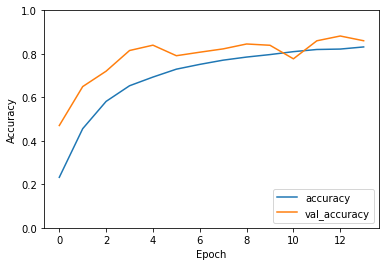

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

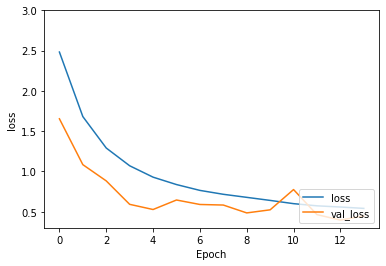

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.3, 3])
plt.legend(loc='lower right')

In [21]:
classifier.evaluate(test_set)

992/992 [==============================] - 31s 31ms/step - loss: 0.4451 - accuracy: 0.8616


[0.4450759291648865, 0.8615648150444031]

In [23]:
classifier.evaluate(training_set)

2972/2972 [==============================] - 152s 51ms/step - loss: 0.1870 - accuracy: 0.9480


[0.18699675798416138, 0.9479653835296631]

In [24]:
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_set.labels, y_pred,labels=list(range(35)))
print(cm)

[[ 8 10  7 ...  8 10  8]
 [ 5  8  4 ... 14  5  8]
 [ 8 12  4 ...  7  9 11]
 ...
 [14 15 10 ... 12  4  7]
 [14  7  8 ... 12  6  5]
 [ 5  7  3 ... 14 12 10]]


(<Figure size 936x936 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

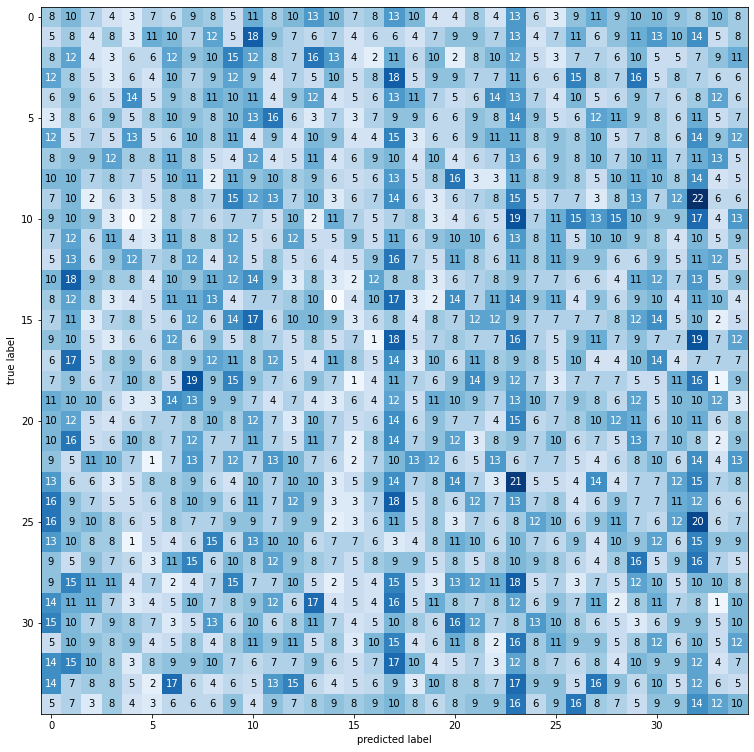

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm,figsize=(13,13))

In [52]:
generator= train_datagen.flow_from_directory("data3\\test", batch_size=10)
label_map = (generator.class_indices)

Found 9934 images belonging to 35 classes.


In [61]:
import os
from keras.preprocessing import image
import cv2
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','1','2','3','4','5','6','7','8','9']
actual=[]
predicted=[]
correct_predictions = 0
total_predictions = 0
for label in labels:
    print("executing "+ label)
    path='data3\\test\\'+str(label)+'\\'
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
                img = cv2.imread(path+filename)
                test_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                test_image = cv2.resize(test_image,(128,128))
                test_image = np.array(test_image)
                test_image = test_image.astype('float32')
                test_image /= 255
                test_image= np.expand_dims(test_image, axis=2)
                test_image= np.expand_dims(test_image, axis=0)
                result = classifier.predict_classes(test_image)
                result=result[0]
                for i,j in label_map.items():
                    if(j==result):
                        print("actual="+label+" pred="+str(i) )
                        if(label==str(i)):
                            correct_predictions=correct_predictions+1
                total_predictions=total_predictions+1
                

executing A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=U
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=X
actual=A pred=A
actual=A pred=A
actual=A pred=A
actual=A pred=K
actual=A pre

actual=B pred=B
actual=B pred=B
actual=B pred=X
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=X
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=A
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=X
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
actual=B pred=B
executing C
actual=C pred=C
actual=C pred=U
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pred=C
actual=C pre

actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=Y
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=Y
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=Y
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=B
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=B
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=A
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=Q
actual=D pred=D
actual=D pred=D
actual=D pred=A
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D pred=D
actual=D

actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=K
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=K
actual=F pred=F
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=Y
actual=F pred=F
actual=F pred=Q
actual=F pred=D
actual=F pred=E
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=Y
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=D
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=E
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F pred=F
actual=F

actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=Q
actual=H pred=W
actual=H pred=E
actual=H pred=F
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=E
actual=H pred=Y
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=W
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=P
actual=H pred=H
actual=H pred=Q
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=E
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H pred=H
actual=H

actual=J pred=J
actual=J pred=J
actual=J pred=I
actual=J pred=E
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=E
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=E
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=L
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=V
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=V
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J pred=J
actual=J

actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=A
actual=K pred=X
actual=K pred=K
actual=K pred=O
actual=K pred=K
actual=K pred=K
actual=K pred=X
actual=K pred=S
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=A
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=I
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=K
actual=K pred=Y
actual=K pred=K
executing L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pred=L
actual=L pre

actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M pred=M
actual=M

actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=I
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=X
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=I
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=I
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=I
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O pred=O
actual=O

actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=C
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=P
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=X
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=A
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=A
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=P
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q pred=Q
actual=Q

actual=S pred=S
actual=S pred=S
actual=S pred=O
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=7
actual=S pred=7
actual=S pred=X
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=O
actual=S pred=O
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=O
actual=S pred=S
actual=S pred=S
actual=S pred=C
actual=S pred=S
actual=S pred=1
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=O
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=X
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=X
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S pred=S
actual=S

actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=L
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=O
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=T
actual=T pred=K
actual=T pred=T
actual=T pred=T
actual=T pred=A
actual=T pred=V
executing U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pred=U
actual=U pre

actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=U
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=L
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V pred=V
actual=V

actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=O
actual=X pred=O
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=U
actual=X pred=X
actual=X pred=U
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=O
actual=X pred=X
actual=X pred=O
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=X
actual=X pred=I
actual=X pred=O
actual=X pred=X
actual=X pred=X
actual=X

actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=O
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=A
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=S
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=P
actual=Z pred=Z
actual=Z pred=S
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z pred=Z
actual=Z

actual=2 pred=2
actual=2 pred=2
actual=2 pred=4
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=7
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=I
actual=2 pred=8
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2 pred=2
actual=2

actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=2
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=H
actual=3 pred=3
actual=3 pred=3
actual=3 pred=2
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=2
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
actual=3 pred=3
executing 4
actual=4 pred=4
actual=4 pred=2
actual=4 pred=2
actual=4 pred=2
actual=4 pred=2
actual=4 pred=2
actual=4 pred=4
actual=4 pred=4
actual=4 pred=4
actual=4 pred=4
actual=4 pred=2
actual=4 pred=1
actual=4 pred=4
actual=4 pred=4
actual=4 pred=4
actual=4 pred=4
actual=4 pred=4
actual=4 pred=2
actual=4 pred=4
actual=4 pred=4
actual=4 pre

actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=8
actual=5 pred=8
actual=5 pred=5
actual=5 pred=8
actual=5 pred=8
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=8
actual=5 pred=K
actual=5 pred=5
actual=5 pred=8
actual=5 pred=X
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=8
actual=5 pred=K
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=L
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=K
actual=5 pred=U
actual=5 pred=8
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=5
actual=5 pred=8
actual=5

actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=V
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=I
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=I
actual=7 pred=7
actual=7 pred=V
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=I
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=I
actual=7 pred=I
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=I
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7 pred=7
actual=7

actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=7
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9 pred=9
actual=9

In [54]:
print(correct_predictions)

8519


In [55]:
print(total_predictions)

9934


In [56]:
print(correct_predictions/total_predictions)

0.8575598953090396


In [81]:
import pyttsx3
def speak(text):
    language='en'
    engine=pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

In [130]:
import os
from keras.preprocessing import image
import cv2
labels=['HELLO','SLEEP','DRINK','WALK','PLAY','READ','DOOR','RADIO','DOCTOR','WRONG','MASK','PLEASE']
actual=[]
predicted=[]
correct_predictions = 0
total_predictions = 0
for label in labels:
    print("executing "+ label)
    path='testdata3\\'+str(label)+'\\'
    pred=""
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
                img = cv2.imread(path+filename)
                test_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                test_image = cv2.resize(test_image,(128,128))
                test_image = np.array(test_image)
                test_image = test_image.astype('float32')
                test_image /= 255
                test_image= np.expand_dims(test_image, axis=2)
                test_image= np.expand_dims(test_image, axis=0)
                result = classifier.predict_classes(test_image)
                result=result[0]
                for i,j in label_map.items():
                    if(j==result):
                        #print(" pred="+str(i) )
                        pred=pred+str(i)
        if filename.endswith(".txt"):
                pred=pred+" "
    print(pred)     
    #print("ans is : "+pred+".")  
    from hunspell import Hunspell
    h = Hunspell()
    if h.spell(pred) is True:
        #print(h.spell(predicted))
        #print(pred)
        speak(pred)
        
    if h.spell(pred) is False:
        
        print(h.suggest(pred))    

executing HELLO
HELLO
executing SLEEP
SLEEP
executing DRINK
DRINK
executing WALK
WALK
executing PLAY
PLAY
executing READ
REAY
('YEAR', 'RAY', 'RELAY', 'READY', 'REPAY', 'REAR', 'REAL', 'RELY', 'READ', 'REAM', 'REAP', 'REA', 'REY', 'RAYE')
executing DOOR
DOOR
executing RADIO
RADIO
executing DOCTOR
DOCTOR
executing WRONG
WRONO
('WRONG', 'ORONO')
executing MASK
MASK
executing PLEASE
PLEASE


In [129]:
import os
from keras.preprocessing import image
import cv2
labels=['HELLO','HAVE','A','NICE','DAY']
actual=[]
predicted=[]
correct_predictions = 0
total_predictions = 0
sentence=""
for label in labels:
    #print("executing "+ label)
    path='testdata3\\'+str(label)+'\\'
    pred=""
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
                img = cv2.imread(path+filename)
                test_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                test_image = cv2.resize(test_image,(128,128))
                test_image = np.array(test_image)
                test_image = test_image.astype('float32')
                test_image /= 255
                test_image= np.expand_dims(test_image, axis=2)
                test_image= np.expand_dims(test_image, axis=0)
                result = classifier.predict_classes(test_image)
                result=result[0]
                for i,j in label_map.items():
                    if(j==result):
                        #print(" pred="+str(i) )
                        pred=pred+str(i)
    sentence=sentence+pred.lower()+" " 
print(sentence)        
speak(sentence)    

hello have a nice day 
